In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

In [84]:
def initialize_network(N):
    
    # Initialize connection matrix with zeros
    J = np.random.normal(loc = 0, scale = 1, size = (N,N))
    for i in range(N):
        for j in range(N):
            J[i,j] /= math.sqrt(N) 
    for i in range(N):
        J[i,i] = 0
    #print(J)

    # Generate ODE
    def activation_ODE(t, x):
        global g
        dxdt = (-x + J @ np.tanh(g*x))
        return dxdt

    # Initialize active nodes randomly
    x_init = np.random.rand(N)

    return activation_ODE, J, x_init

def initialize_network2(N, g):
    # Generate a random matrix with zero mean and unit variance
    J = np.random.normal(loc=0, scale=1, size=(N, N))
    
    # Adjust variance to meet the desired condition
    variance = np.mean(J**2)
    scaling_factor = np.sqrt(g**2 / (N * variance))
    J *= scaling_factor
    
    np.fill_diagonal(J, 0)  # Set diagonal elements to zero
    return J

def simulate_history(N, g, num_of_T, resolution):
    activation_ODE, J, x_init = initialize_network(N)
    t_sim = num_of_T
    t_eval = np.arange(0, t_sim, 1/resolution)
    sol = solve_ivp(activation_ODE, [0, t_sim], x_init, t_eval=t_eval)
    activation_history = sol.y

    return J, activation_history


def plot_eigenvalues(J):
    eigenvalues = np.linalg.eigvals(J)
    plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'bo')
    plt.title('Eigenvalues of Matrix J')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)
    plt.show()

In [89]:
# Parameters
N = 1000                # Number of nodes
#C = 20                  # Number of connections per node
#tau = 1                 # time constant
num_of_T = 100           # number of simulated time constants
resolution = 10         # resolution of each time constant

#mu = 0                  # connectivity mean
global g
g = 1.1                 # measure of connectivity variance
#nonlin = 1              # nonlinearity parameter

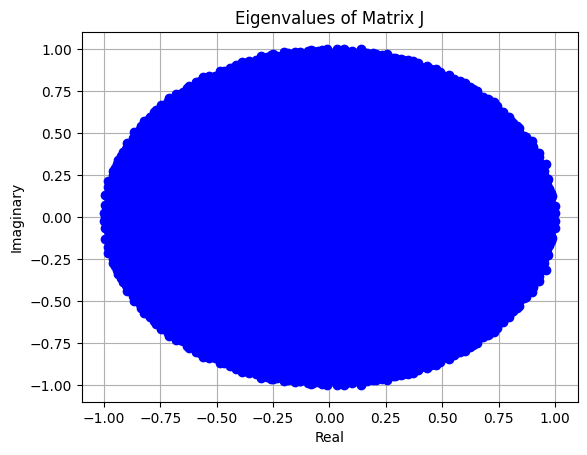

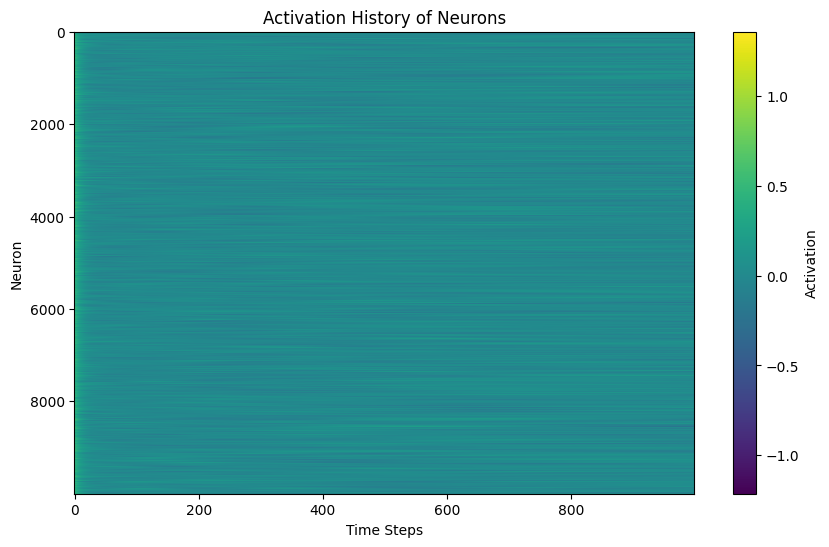

In [90]:
J, activation_history = simulate_history(N, g, num_of_T, resolution)

plot_eigenvalues(J)

plt.figure(figsize=(10, 6))
plt.imshow(activation_history, aspect='auto', cmap='viridis')
plt.colorbar(label='Activation')
plt.title('Activation History of Neurons')
plt.xlabel('Time Steps')
plt.ylabel('Neuron')
plt.show()